# Numerical differentiation

## Estimating a derivative at a point

In this exercise, we will consider the accuracy of backwards, forwards, and centered difference schemes for evaluating the derivative of an analytical function.

To start, let's consider a very simple analytical function

$$ f(x) = \dfrac{\sin}{x^3}.$$

It has the exact analytical derivative of 

$$ \dfrac{df}{dx} = -3 \dfrac{\sin x}{x^4} + \dfrac{\cos x}{x^3}.$$

A _backwards difference_ approximation of the derivative at a point $x$ is

$$ \left(\dfrac{df}{dx}\right)_{BD} = \dfrac{f(x) - f(x-\Delta x)}{\Delta x} + \mathcal{O}(\Delta x).$$

A _forwards difference_ approximation of the derivative is

$$ \left(\dfrac{df}{dx}\right)_{FD} = \dfrac{f(x+\Delta x) - f(x)}{\Delta x} + \mathcal{O}(\Delta x).$$

A _second-order centered difference_ approximation of the derivative is

$$ \left(\dfrac{df}{dx}\right)_{CD-2} = \dfrac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2).$$

A _fourth-order centered difference_ approximation of the derivative is

$$ \left(\dfrac{df}{dx}\right)_{CD-4} = \dfrac{f(x - 2\Delta x) - 8 f(x - \Delta x) + 8 f(x + \Delta x) - f(x + 2\Delta x)}{12\Delta x} + \mathcal{O}(\Delta x^4).$$

Let's examine the accuracy of these approximations of the derivative. Will do so by comparing the value of the exact analytical derivative at a point $x = 1$ between the analytical values and the approximate numerical ones.

Begin by importing the required libraries into Python

In [23]:
import numpy as np
import matplotlib.pyplot as plt

### Function evaluation sub-routine

Define a sub-routine that evaluates the function $f$ and a point $x$

In [24]:
def evalf(x):
    return np.sin(x)/(x**3)

### Main program

Now in our main progam, we will evaluate the derivative approximations at $x = 1$ with five different values of $\Delta x = [10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}]$.

To do so, let's create an array $h$ that contains those entries of $\Delta x$:

In [25]:
h=10**np.linspace(-1,-5,5)
print('h = ',h)

h =  [1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


Now, let's evaluate $f$ at $x=1$ for these values of $h$. Let's also evaluate the exact value of the analytical derivative:

In [26]:
x = 1

fpa = -3*np.sin(x)/(x**4) + np.cos(x)/(x**3)

fp1 = (evalf(x)-evalf(x-h))/h
fp2 = (evalf(x+h)-evalf(x-h))/(2*h)
fp4 = (evalf(x-2*h) - 8*evalf(x-h) + 8*evalf(x+h) - evalf(x+2*h))/(12*h)
print('fp1 =',fp1)
print('fp2 =',fp2)
print('fp4 =',fp4)
print('fpa =',fpa)


fp1 = [-2.33051525 -2.01458762 -1.98712184 -1.98441141 -1.98414072]
fp2 = [-2.02472615 -1.98451078 -1.98411465 -1.98411069 -1.98411065]
fp4 = [-1.98154183 -1.98411041 -1.98411065 -1.98411065 -1.98411065]
fpa = -1.9841106485555495


Notice how each value in the array is progressively getting closer to the analytical value as $\Delta x$ is getting smaller. To make this even more clear, let's evaluate the absolute error between the exact and approximate derivatives. The error is defined as

$$ error = | approximate - analytical |.$$

In [27]:
error1 = np.abs(fp1 - fpa) 
error2 = np.abs(fp2 - fpa)
error4 = np.abs(fp4 - fpa)

We can plot the error as a function of $\Delta x$ to see how the error decreases with decreasing $\Delta x$:

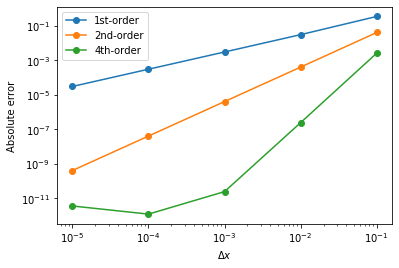

In [28]:
plt.loglog(h,error1,'o-',label='1st-order')
plt.loglog(h,error2,'o-',label='2nd-order')
plt.loglog(h,error4,'o-',label='4th-order')
plt.xlabel('$\Delta x$')
plt.ylabel('Absolute error')
plt.legend()

Now, there's a lot we could say about this plot. Begin by considering the different slope between the first, second, and fourth-order approximations. You see that the error drops pretty slowly with decreasing $\Delta x$ in the first-order case, but much more rapidly for the second-order case. The error drops even more rapidly with refinements in $\Delta x$ for the fourth-order case.

This shows us a very important feature of finite-difference approximations--their _order of accuracy_. We can see that the order of accuracy reflects the rate at which error drops with refinements in the grid, i.e. the slope of the error curve.

We can quantify the order of accuracy for a given finite difference approximation as follows. If $\phi_{h_i}$ is the solution with $h_i$, we estimate the order of accuracy $p$ from the solution on three successively-refined grids as

$$ p = \dfrac{ -\log \left( \dfrac{\phi_{h_1} - \phi_{h_2}}{\phi_{h_0} - \phi_{h_1}} \right) }{\log \left( \dfrac{h_1}{h_0} \right)}. $$

Note: the above equation requires that the ratio between successively-refined grids by equal, i.e. $h_0/h_1$ must equal $h_1/h_2$.

In [29]:
p1 = -np.log10( (fp1[1]-fp1[2])/(fp1[0]-fp1[1]) ) / np.log10(10)
p2 = -np.log10( (fp2[1]-fp2[2])/(fp2[0]-fp2[1]) ) / np.log10(10)
p4 = -np.log10( (fp4[1]-fp4[2])/(fp4[0]-fp4[1]) ) / np.log10(10)
print('Order of accuracy:',p1,p2,p4)

Order of accuracy: 1.0607956701992465 2.006550712254356 4.029237128842392


This confirms that our finite difference approximations have first, second, and fourth-order accuracy.

## Estimating the derivative across a line

In our above exercise, we approximated the derivative of a function at a point and compared the error to the exact analytical value at that point. In practice, however, we are not just interested in a single point, but a whole region which could be 1D, 2D, or 3D. Let's limit ourselves to 1D for now. Thus, we want to approximate the derivative along a line and evaluate how much error there is along the line.

For this exercise, let's consider another function

$$f(x) = \cos^2 x \log x  \quad x \in [x_1, x_2] $$

where $x_1$ and $x_2$ are the start and end points of our line. $f(x)$ has an exact derivative of 

$$\dfrac{df}{dx} = -\sin 2x \log x + \dfrac{\cos^2 x}{x}.$$

### Quantifying the global error

To estimate the error along the whole line we need some way of evaluating the error at each point that defines the line and adding them up in some way. Mathematically, this is done using various types of _norms_ that define the error. The most common type of norm is the $L^2$ norm. The $L^2$ norm is a way of quantifying the magnitude of the error over the whole solution space. It is defined as

$$ L^2 (\epsilon) = \sqrt{ \sum_{i=1}^{N} \epsilon_i^2 }, $$

where $\epsilon_i$ is the error at point $i$ in the discrete approximation of the derivative:

$$\epsilon_i = \left(\dfrac{df}{dx}\right)_{Numerical} - \left(\dfrac{df}{dx}\right)_{Analytical} $$

In [30]:
def l2error(numerical,analytical):
    return (np.sum((numerical-analytical)**2))**0.5

### Subroutine to evaluate the numerical derivatives

The next sub-routine defines the analytical function, the analytical derivative, and the numerical approximation of the derivative using forwards, backwards, and centered differences.

First, define the subroutine:

In [31]:
def evaldiff(nx):

# Define start and end points
    x1 = 0.1
    x2 = 4.0

# Define the function space with nx discrete points
    x = np.linspace(x1,x2,nx)

# Now, define the analytical function
    f = np.cos(x)**2*np.log(x)    
    
# And the exact derivative of the analytical function
    fp = -np.sin(2*x)*np.log(x) + np.cos(x)**2/x

# Now compute the forwards difference approximation of the derivative. For simplicity, copy the fp array, renaming it fp_for
    fp_for = fp.copy()

# Evaluate the forwards difference approximation:
    fp_for[1:] = (f[1:]-f[0:-1])/(x[1:]-x[0:-1])

# The forwards difference cannot be evaluated at x[0], so make the approximation there zero
    fp_for[0] = 0

# Now evaluate the L2-norm of the error, using the already-defined subroutine
    l2err_for = l2error(fp[1:-1],fp_for[1:-1])
    
# Repeat for centered difference scheme. For similar reasons as above, the centered difference 
# cannot be evaluated at x[0] and x[nx-1] (i.e. first and last indices in the array), so set them to zero. We
# could probably think of something smarter to do, but this will be sufficient for illustrative purposes.
    fp_cen = fp.copy()
    fp_cen[1:-1] = (f[2:]-f[0:-2])/(x[2:]-x[0:-2])
    fp_cen[0] = 0
    fp_cen[nx-1] = 0
    l2err_cen = l2error(fp[1:-1],fp_cen[1:-1])

# For visualization purposes, plot the analytical and centered difference approximations to the derivative
    plt.xlim(0,4)
    plt.ylim(-2,10)
    plt.plot(x,fp,'.',label='Analytical')
    plt.plot(x,fp_cen,label='CD')
    plt.xlabel('$x$')
    plt.ylabel('$df/dx$')
    
    return [l2err_for, l2err_cen]

Now, we want to see how the accuracy of our finite difference approximation varies with the size of the discrete steps in our one-dimensional grid for $x$. To do this, I will call the evaluation subroutine repeatedly in a loop, refining the grid by doubling the number of points in my discrete function at each iteration.

------------------------------------------------------------------
Nx	 Dx			 L2norm-FD		 L2norm-CD
------------------------------------------------------------------
8 	 1.4285714285714286 	 2.471016957070519 	 0.8135206164313475
16 	 0.6666666666666666 	 2.4626219367779676 	 0.6927900751131821
32 	 0.3225806451612903 	 2.2971663301056577 	 0.560049934686656
64 	 0.15873015873015872 	 1.9305332556460186 	 0.3474439602849563
128 	 0.07874015748031496 	 1.4907209906132723 	 0.17126211711059797
256 	 0.0392156862745098 	 1.0982378118218254 	 0.07240787180915437
512 	 0.019569471624266144 	 0.7915008554382682 	 0.028064087281052627
1024 	 0.009775171065493646 	 0.5647682172432231 	 0.010393588603893413
2048 	 0.004885197850512946 	 0.4011133862711273 	 0.0037613436790542663
4096 	 0.002442002442002442 	 0.28424564618959386 	 0.0013454543719970365
8192 	 0.0012208521548040532 	 0.2012083597323847 	 0.0004784777776393357
16384 	 0.0006103888176768602 	 0.14235204331820364 	 0.000169662647881

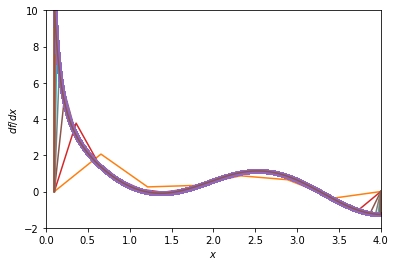

In [32]:
# Define the number of iterations I will perform (i.e. the number of successive refinements)
n = 13

# Initialize an array in which I will store the L2-norm obtained at each iteration level
l2norm = np.zeros([n,2]) 

# Initialize an array in which I will store the grid size at each iteraction level
dx = np.zeros(n)

# Output a table heading to the screen:
print('------------------------------------------------------------------')
print('Nx\t','Dx\t\t\t','L2norm-FD\t\t','L2norm-CD')
print('------------------------------------------------------------------')

# Loop over the refinement levels, calculating the L2 norms for FD and CD schemes at each level.
# Note, at the first refinement level, I cannot have zero discrete points, so I start from 2^4 = 8 points,
# and then successively double the number of points at each iteration, hence halving the grid size.
for i in range(0,n):
    nx = 2**(i+3)
    dx[i] = 10/(nx-1)
    l2norm[i,:] = evaldiff(nx)
    print(nx, '\t', 10/(nx-1), '\t', l2norm[i,0], '\t', l2norm[i,1])

Notice in the above plot how the thick purple line (analytical function) differs from the finer lines (numerical approximation via centered difference), and the difference (i.e. error) is worse when the grid is coarse. You see the same thing in the table--the $L^2$ norm is smaller when the value of $\Delta x$ is small.

We can plot the $L^2$ norm as a function of $\Delta x$ on logarithmic scales to reveal the rate at which the error decays in the numerical approximation.

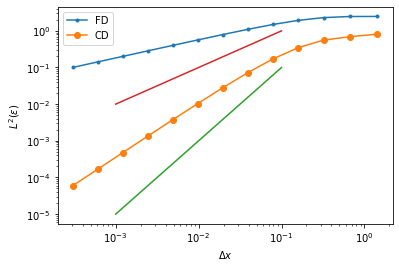

In [33]:
# Plot the L2-norm error versus grid size  for each case on log axes
plt.loglog(dx,l2norm[:,0],'.-',label='FD')
plt.loglog(dx,l2norm[:,1],'o-',label='CD')
plt.xlabel('$\Delta x$')
plt.ylabel('$L^2(\epsilon)$')
plt.legend()
plt.loglog([1e-1,1e-3],[1e-1,1e-5])
plt.loglog([1e-1,1e-3],[1e0,1e-2])

The red and green lines have slopes of 1 and 2, respectively. It shows that for the CD scheme, the $L^2$ norm reduces at slightly less than $\mathcal O (\Delta x^2)$, and for the FD scheme, the $L^2$ norm reduces at slightly less than $\mathcal O (\Delta x)$. Thus, we have demonstrated that the FD and CD are *first-order* and *second-order* accurate schemes.

Evaluation of the backwards difference is left as an exercise.

Note that in the above plot, the error curves don't exactly follow the first and second-order slopes, and the error initially decays very slowly when the initial grid is very coarse at the largest $\Delta x$ values. Why do you think this occurs?